**1. IMPORTING THE REQ **LIBRARIES** **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**2.LOAD AND PREPROCESS THE DATA**

In [10]:
df=pd.read_csv('/content/Housing[1].csv')
df_selected = df[['price', 'area', 'bedrooms', 'bathrooms', 'airconditioning']]
df_selected['airconditioning'] = df_selected['airconditioning'].map({'yes': 1, 'no': 0})
df_selected = df_selected.dropna()
df_selected.head()




<ipython-input-10-b20343637a66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['airconditioning'] = df_selected['airconditioning'].map({'yes': 1, 'no': 0})


,price,area,bedrooms,bathrooms,airconditioning
0,13300000,7420,4,2,1
1,12250000,8960,4,4,1
2,12250000,9960,3,2,0
3,12215000,7500,4,2,1
4,11410000,7420,4,1,1


**3. SPLIT THE DATA TRAINING VS TESTING**

In [11]:
X = df_selected[['area', 'bedrooms', 'bathrooms', 'airconditioning']]
y = df_selected['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


**4.TRAIN THE REGRESSION MODEL**

In [16]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**5.PREDICT USING THE MODEL**

In [17]:
y_pred=model.predict(X_test)

**6. EVALUATE THE MODEL**

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 957268.8458534151
MSE: 1839925847221.6135
R² Score: 0.5618384894165427


**7. PLOTTING THE PREDICTIONS**

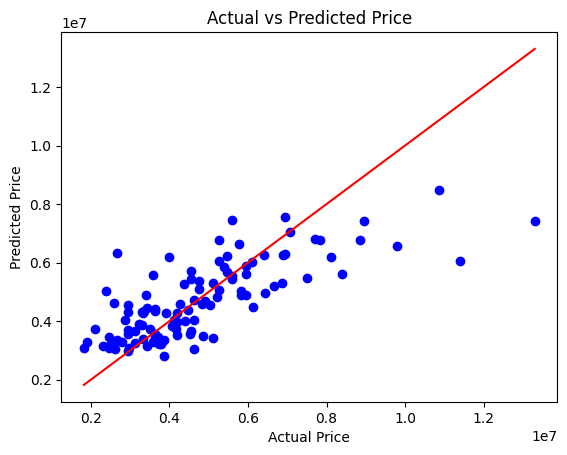

In [19]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()